# **Analisis Penjualan Mobil**

## **Latar Belakang**

Pasar otomotif di Amerika adalah salah satu yang terbesar dan paling dinamis di dunia, dengan berbagai faktor yang mempengaruhi perilaku pembelian konsumen. Dalam beberapa tahun terakhir, perubahan preferensi konsumen, fluktuasi ekonomi, dan tantangan rantai pasokan global telah berdampak signifikan pada tren penjualan mobil. Preferensi pembeli dipengaruhi oleh faktor-faktor seperti harga, ketersediaan, dan lokasi dealer. 

Oleh karena itu, analisis mendalam terhadap data transaksi penjualan mobil sangat penting untuk memahami pola penjualan, menilai preferensi konsumen terhadap jenis dan model kendaraan, dan mengidentifikasi lokasi dealer yang memiliki potensi penjualan yang lebih tinggi. Dengan pemahaman ini, strategi pemasaran dan penjualan dapat dioptimalkan untuk meningkatkan kinerja penjualan di pasar yang kompetitif ini.

### Pernyataan Masalah

- Analisis demografi pembeli mobil.
- Analisis trend penjualan mobil dari tahun 2022–2023.
- Analisis dealer dengan potensi penjualan tinggi.

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# Fungsi menampilkan anotasi pada grafik
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width() + 200,
            y + bar.get_height()/2, 
            f'{bar.get_width():.0f} ',
            va='center', 
            ha='left', 
            color='black'
        )
    return ax

# Fungsi menghilangkan garis frame pada grafik
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    return ax

## **Data Understanding**

Berikut merupakan 5 baris teratas dan terbawah dari data car.

In [3]:
# Import dataset 
car = pd.read_csv('Car Sales.csv')

# Menampilkan data
display(car.head(3), car.tail(3))

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


Dataset ini berisi informasi mengenai data transaksi meliputi data diri dari pembeli, lokasi, dan jenis mobil yang dibeli.

| Feature | Description |
| --- | --- |
| Car_id | ID dari setiap penjualan mobil |
| Date | Tanggal dari setiap pembelian | 
| Customer Name | Nama dari setiap pembeli | 
| Gender | Gender dari setiap pembeli |
| Annual Income | Keterangan pendapatan tahunan dari pembeli |
| Dealer_Name | Keterangan nama dealer tempat penjualan |
| Company | Keterangan perusahaan mobil |
| Model | Model mobil yang dibeli |
| Engine | Jenis mesin dari mobil yang dibeli |
| Transmission | Keterangan transmisi dari mobil yang dibeli |
| Color | Warna dari mobil yang dibeli |
| Price ($) | Harga mobil |
| Dealer_No | Nomor id dari dealer |
| Body Style | Keterangan tipe body dari mobil |
| Phone | Keterangan nomor telepon dari pembeli |
| Dealer_Region | Keterangan lokasi dari dealer |

In [4]:
print(f'Jumlah baris dan kolom di dataset car adalah {car.shape}')
car.info()

Jumlah baris dan kolom di dataset car adalah (23906, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': car.columns.values,
    'data_type': car.dtypes.values,
    'null': car.isna().mean().values * 100,
    'negative': [True if car[col].dtype == int and (car[col] < 0).any() else False for col in car.columns],
    'n_unique': car.nunique().values,
    'sample_unique': [car[col].unique() for col in car.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Car_id,object,0.000000,False,23906,"[C_CND_000001, C_CND_000002, C_CND_000003, C_C..."
1,Date,object,0.000000,False,612,"[1/2/2022, 1/3/2022, 1/4/2022, 1/5/2022, 1/6/2..."
2,Customer Name,object,0.004183,False,3021,"[Geraldine, Gia, Gianna, Giselle, Grace, Guada..."
3,Gender,object,0.000000,False,2,"[Male, Female]"
4,Annual Income,int64,0.000000,False,2508,"[13500, 1480000, 1035000, 1465000, 850000, 160..."
5,Dealer_Name,object,0.000000,False,28,"[Buddy Storbeck's Diesel Service Inc, C & M Mo..."
6,Company,object,0.000000,False,30,"[Ford, Dodge, Cadillac, Toyota, Acura, Mitsubi..."
7,Model,object,0.000000,False,154,"[Expedition, Durango, Eldorado, Celica, TL, Di..."
8,Engine,object,0.000000,False,2,"[DoubleÂ Overhead Camshaft, Overhead Camshaft]"
9,Transmission,object,0.000000,False,2,"[Auto, Manual]"


Berdasarkan dataset car, kita dapat memahami bahwa data memiliki 23906 baris dan 16 kolom. Pada kolom null kita dapat melihat persentase missing value di dalam data, terdapat missing value pada kolom Customer Name sebanyak 0.004%. Dari tabel diatas juga dapat dilihat banyaknya nilai unik dan contoh-contoh nilai unik pada masing-masing kolom.

## **Data Cleaning**

Pada sebuah dataset yang akan dianalisis, terkadang data masih memiliki nilai yang kosong, data duplikat atau terdapat data outlier, sehingga data masih belum bisa dianalisis. Pada tahap data cleaning, dataset akan dibersihkan terlebih dahulu dan dipersiapkan untuk bisa dianalisis. Pertama-tama kita akan mengecek data duplikat pada dataset car.

### Data Duplikat

In [6]:
# Mengecek data duplikat
car.duplicated().sum()

0

Setelah dicek data duplikatnya, tidak ditemukan adanya data duplikat pada dataset tersebut. Selanjutnya kita akan mengecek missing value pada dataset car.

### Missing Value

In [7]:
# Mengecek jumlah baris yang missing value pada setiap kolom
car.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

Ditemukan missing value pada kolom Customer Name, dan hanya terdapat 1 baris yang terdapat missing value pada dataset car. Dikarenakan persentase missing value dibandingkan dengan keseluruhan data hanya 0.004% maka missing value akan dihapus.

In [8]:
# Menghapus missing value
car = car.dropna()

In [9]:
# Mengecek kembali missing value pada setiap kolom
car.isna().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

### Outlier

Selanjutnya kita akan mencoba untuk mengecek data outlier pada data car. Pengujian outlier pada data dapat mengetahui data yang nilainya cukup berbeda jauh dari kebanyakan datanya. Keberadaan outlier ini juga cukup penting untuk diperhatikan karena outlier dapat mempengaruhi measures of central tendency.

Nilai rata-rata pada suatu data sangat sensitif dengan keberadaan outlier. Outlier yang nilainya sangat jauh dari nilai kebanyakan datanya dapat mengaburkan nilai rata-rata yang sebenarnya. Pada data yang tidak terdistribusi normal, sebaiknya menggunakan median sebagai measures of central tendency, karena median merupakan nilai tengah dari suatu data dan tidak terpengaruh oleh keberadaan outlier. Handling data outlier yang tepat tergantung pada domain knowledge tertentu, seberapa besar outlier mempengaruhi data dan tujuan dari analisis.

In [10]:
# Menghitung IQR
Q1 = car['Annual Income'].quantile(0.25)
Q3 = car['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas atas dan batas bawah
outlier_upper_limit = Q3 + 1.5 * IQR
outlier_lower_limit = Q1 - 1.5 * IQR

# Tampilkan hasil
print('Nilai Q1:', Q1)
print('Nilai Q3:', Q3)
print('Nilai IQR:', IQR)
print('Batas atas:', outlier_upper_limit)
print('Batas bawah:', outlier_lower_limit)

# Menghitung jumlah outlier
number_of_outliers = len(car[(car['Annual Income'] < outlier_lower_limit) | (car['Annual Income'] > outlier_upper_limit)])

print('Jumlah Outlier:', number_of_outliers)
print('Persen Outlier:', round(number_of_outliers/len(car['Annual Income'])*100,2))

Nilai Q1: 386000.0
Nilai Q3: 1176000.0
Nilai IQR: 790000.0
Batas atas: 2361000.0
Batas bawah: -799000.0
Jumlah Outlier: 815
Persen Outlier: 3.41


Kemudian, kita juga akan menentukan nilai IQR pada kolom Price, berikut merupakan hasil dari nilai IQR dan nilai outlier pada kolom Price.

In [11]:
# Menghitung IQR
Q1 = car['Price ($)'].quantile(0.25)
Q3 = car['Price ($)'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas atas dan batas bawah
outlier_upper_limit = Q3 + 1.5 * IQR
outlier_lower_limit = Q1 - 1.5 * IQR

# Tampilkan hasil
print('Nilai Q1:', Q1)
print('Nilai Q3:', Q3)
print('Nilai IQR:', IQR)
print('Batas atas:', outlier_upper_limit)
print('Batas bawah:', outlier_lower_limit)

# Menghitung jumlah outlier
number_of_outliers = len(car[(car['Price ($)'] < outlier_lower_limit) | (car['Price ($)'] > outlier_upper_limit)])

print('Jumlah Outlier:', number_of_outliers)
print('Persen Outlier:', round(number_of_outliers/len(car['Price ($)'])*100,2))

Nilai Q1: 18001.0
Nilai Q3: 34000.0
Nilai IQR: 15999.0
Batas atas: 57998.5
Batas bawah: -5997.5
Jumlah Outlier: 1449
Persen Outlier: 6.06


Dari hasil pengujian diketahui bahwa jumlah data yang nilainya outlier pada kolom Price terdapat 1449 data sebesar 6.06 persen dan jumlah data yang nilainya outlier pada kolom Annual Income terdapat 815 data sebesar 3.41 persen. Batas bawah pada hasil perhitungan diatas tidak nyata, karena nilai terendah pada distribusi data pada kolom Annual Income dan Price diatas 0 dan tidak ada yang bernilai negatif. 

Pada kasus ini nilai outlier pada kolom Annual Income dan Price merupakan data yang menggambarkan kondisi nyata, sehingga keberadaan outlier pada dataset ini masih dibutuhkan untuk merepresentasikan pasar secara utuh.

## **Data Analysis**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis. Terlebih dahulu kita akan mengecek deskriptif statistik dari dataset car.

In [12]:
# Menampilkan deskriptif statistik
display(car.describe(), car.describe(include='object'))

,Annual Income,Price ($),Phone
count,2.390500e+04,23905.000000,2.390500e+04
mean,8.308466e+05,28089.540473,7.497753e+06
std,7.200208e+05,14788.592495,8.675080e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746465e+06
50%,7.350000e+05,23000.000000,7.496199e+06
75%,1.176000e+06,34000.000000,8.248172e+06
max,1.120000e+07,85800.000000,8.999579e+06


,Car_id,Date,Customer Name,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Dealer_Region
count,23905,23905,23905,23905,23905,23905,23905,23905,23905,23905,23905,23905,23905
unique,23905,612,3021,2,28,30,154,2,2,3,7,5,7
top,C_CND_000001,9/5/2023,Thomas,Male,Progressive Shippers Cooperative Association No,Chevrolet,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,85257-3102,SUV,Austin
freq,1,190,92,18797,1318,1819,418,12570,12570,11255,3814,6374,4135


Kita akan mencoba melakukan uji statistik distribusi data menggunakan D’Agostino-Pearson. Kita perlu mendefinisikan terlebih dahulu kolom-kolom yang akan diuji distribusi datanya. Kolom-kolom yang akan diuji distribusi datanya hanya pada kolom-kolom numerikal.

In [13]:
# Membuat list kolom-kolom dengan tipe data numerical
numerical = [var for var in car.columns if car[var].dtypes != 'object']

In [14]:
# Import library normaltest
from scipy.stats import normaltest

# Uji distribusi data
dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(car[feature_name])
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Annual Income,9502.601664,0.0,Not Normally Distributed
1,Price ($),5947.061226,0.0,Not Normally Distributed
2,Phone,20660.064518,0.0,Not Normally Distributed


Setelah dilakukan uji distribusi terhadap dataset car, diketahui bahwa kolom-kolom numerikal pada dataset car tidak terdistribusi normal.

Kita dapat menganalisis distribusi data dengan manampilkannya dalam grafik histogram, untuk melihat persebaran data, nilai rata-rata dan nilai tengahnya. Kita juga dapat memadukannya dengan grafik boxplot untuk melihat persebaran outlier di dalam data.

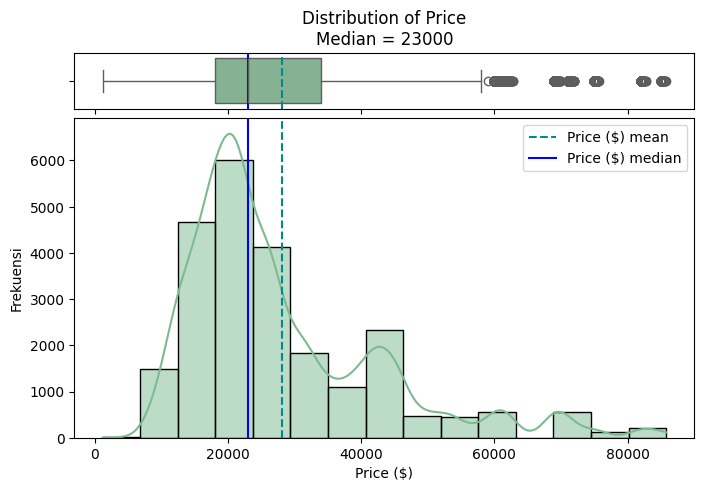

In [32]:
# Membuat figura untuk grafik
fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(8,5), gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

# Membuat grafik boxplot
ax1.set_title(f'Distribution of Price\nMedian = {car['Price ($)'].median():.0f}', color='black')
sns.boxplot(x=car['Price ($)'], ax=ax1)
ax1.axvline(car['Price ($)'].mean(), color='darkcyan', linestyle='--')
ax1.axvline(car['Price ($)'].median(), color='b', linestyle='-')

# Membuat grafik histogram
sns.histplot(data=car['Price ($)'], ax=ax2, kde=True, bins=15)
ax2.set_ylabel('Frekuensi')
ax2.axvline(car['Price ($)'].mean(), color='darkcyan', linestyle='--', label='Price ($) mean')
ax2.axvline(car['Price ($)'].median(), color='b', linestyle='-', label='Price ($) median')

# Set warna palette dan menampilkan plot
sns.set_palette("crest")
plt.legend()
plt.show()

Distribusi harga mobil yang ditampilkan melalui grafik histogram menunjukkan pola right-skewed (positively skewed), dengan nilai tengah (median) harga berada di sekitar $23,000. Pola ini mengindikasikan bahwa sebagian besar mobil yang terjual berada dalam kisaran harga rendah hingga menengah, sementara sejumlah kecil mobil dengan harga jauh lebih tinggi membentuk ekor distribusi ke arah kanan.

Skewness ini umumnya disebabkan oleh adanya outlier atau unit mobil premium dengan harga sangat tinggi, yang tidak mewakili mayoritas penjualan namun tetap signifikan secara statistik. Perbedaan antara median dan mean harga juga mengindikasikan adanya ketidakseimbangan distribusi.

### Demografi Konsumen

#### Pendapatan Tahunan

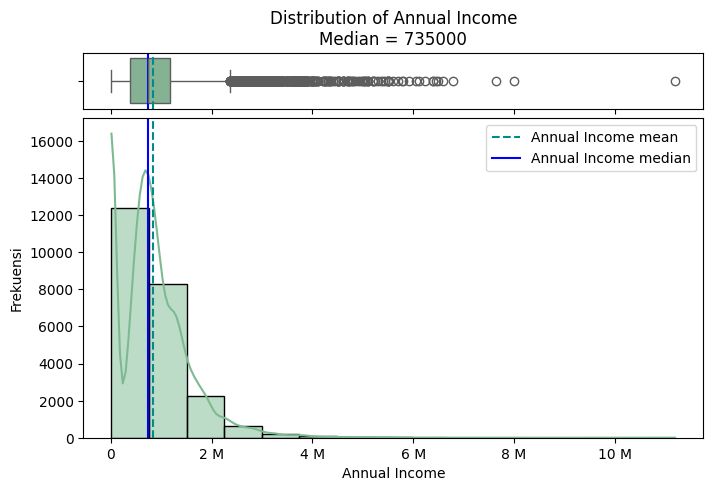

In [16]:
# Membuat figura untuk grafik
fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(8,5), gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

# Membuat grafik boxplot
ax1.set_title(f'Distribution of Annual Income\nMedian = {car['Annual Income'].median():.0f}', color='black')
sns.boxplot(x=car['Annual Income'], ax=ax1)
ax1.axvline(car['Annual Income'].mean(), color='darkcyan', linestyle='--')
ax1.axvline(car['Annual Income'].median(), color='b', linestyle='-')

# Membuat grafik histogram
sns.histplot(data=car['Annual Income'], ax=ax2, kde=True, bins=15)
ax2.set_ylabel('Frekuensi')
ax2.axvline(car['Annual Income'].mean(), color='darkcyan', linestyle='--', label=f'Annual Income mean')
ax2.axvline(car['Annual Income'].median(), color='b', linestyle='-', label=f'Annual Income median')

# Mengatur satuan sumbu-x
ax2.xaxis.set_major_formatter(ticker.EngFormatter())

# Set warna palette dan menampilkan plot
sns.set_palette("crest")
plt.legend()
plt.show()

Dari grafik histogram mengenai persebaran data Annual Income dapat terlihat bahwa distribusi pendapatan tahunan menunjukkan pola right-skewed, dengan median pendapatan sekitar \$735,000.

Ini merupakan angka yang jauh di atas rata-rata pendapatan rumah tangga di Amerika Serikat, yang secara umum dikategorikan kelas atas pada kisaran \$150,000–\$200,000 per tahun.

Kondisi ini menunjukkan bahwa mayoritas pembeli dalam dataset ini berasal dari segmen dengan **pendapatan sangat tinggi**, bahkan masuk kategori top earners. Hal ini memperkuat asumsi bahwa pasar yang dianalisis lebih mewakili konsumen premium, bukan populasi umum.

Adanya outlier di sisi kanan grafik juga menyebabkan nilai rata-rata terdorong naik, memperkuat kesan bahwa sebagian kecil pembeli memiliki pendapatan yang sangat ekstrem.


#### Gender

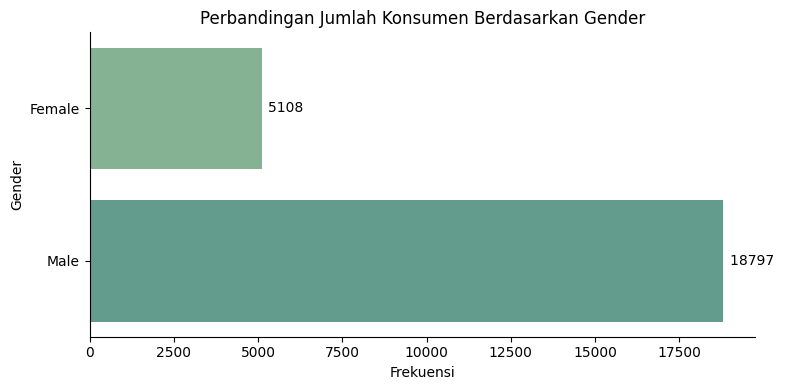

In [17]:
# Membuat figura untuk grafik
fig = plt.subplots(figsize=(8,4))

# Menghitung frekuensi masing-masing kategori
count_data_gender = car.groupby(['Gender']).size().reset_index(name='Count')

# Membuat barplot 
ax = sns.barplot(data=count_data_gender, y='Gender', x='Count', hue='Gender', orient='h')
sns.set_palette('crest')

# Menambahkan label dan judul
plt.ylabel('Gender')
plt.xlabel('Frekuensi')
plt.title('Perbandingan Jumlah Konsumen Berdasarkan Gender')
annotate_bars(ax)
despine(ax)

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari grafik diatas, dapat dilihat bahwa mayoritas pembeli mobil pria 3 kali lebih banyak dari pembeli wanita.

Perbedaan ini bisa mencerminkan adanya preferensi yang berbeda antara pria dan wanita dalam memilih kendaraan, baik dari segi fungsi, desain, maupun kebutuhan harian. Selain itu, hasil ini juga dapat mengindikasikan bahwa strategi pemasaran selama ini lebih terfokus pada konsumen pria, sehingga membuka peluang untuk mengembangkan pendekatan yang lebih inklusif bagi segmen wanita. Perbedaan kriteria dan kebutuhan antara kedua gender ini dapat menjadi dasar untuk menciptakan produk atau kampanye yang lebih tepat sasaran. 

Dengan memahami lebih dalam faktor sosial dan budaya yang mempengaruhi keputusan pembelian, perusahaan dapat merancang strategi yang mampu menjangkau segmen pasar yang selama ini belum tergarap secara optimal.

### Analisis Tren Penjualan Mobil Tahun 2022 - 2023

Kita akan menganalisis tren dari penjualan mobil sepanjang tahun 2022–2023. Pada kolom Date, tipe data perlu diganti menjadi datetime terlebih dahulu.

In [18]:
# Konversi kolom Date ke datetime
car['Date'] = pd.to_datetime(car['Date'])

In [19]:
# Cek tipe data kolom Date
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

Selanjutnya kita perlu mengelompokkan data berdasarkan bulan, setelah itu akan dibuat grafik yang menggambarkan trend dari penjualan mobil.

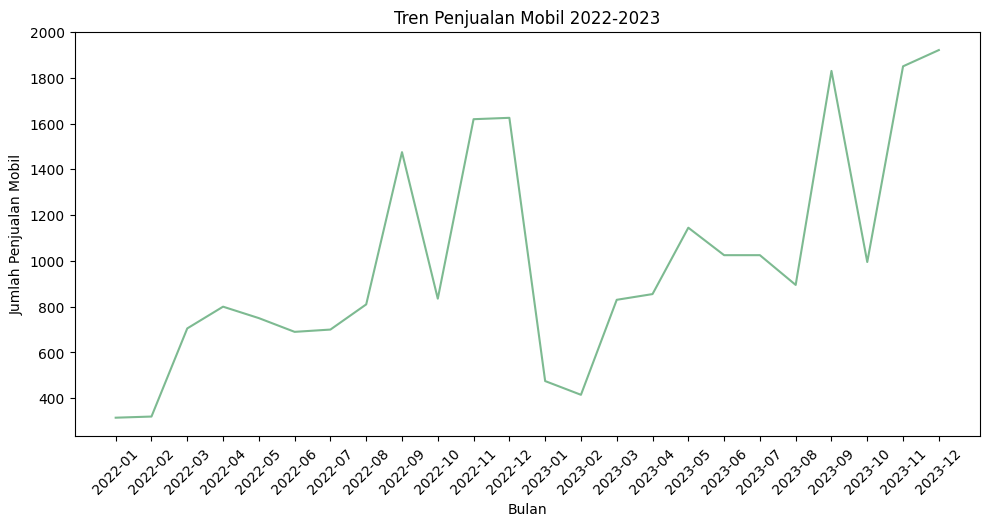

In [20]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan per bulan
car['Bulan'] = car['Date'].dt.to_period('M')
car_sales = car.groupby('Bulan')[['Car_id']].count().sort_values(by='Bulan',ascending=True)

# Membuat grafik line plot
plt.figure(figsize=(10, 5))
plt.plot(car_sales.index.astype(str), car_sales['Car_id'], linestyle='-')

# Label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan Mobil')
plt.title('Tren Penjualan Mobil 2022-2023')

# Menampilkan grafik
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik tren penjualan per bulan, terlihat adanya peningkatan signifikan pada bulan September serta lonjakan yang lebih tajam pada bulan November dan Desember. Pola ini mencerminkan adanya kecenderungan peningkatan aktivitas pembelian kendaraan menjelang akhir tahun, yang kemungkinan besar didorong oleh berbagai faktor musiman seperti program promosi akhir tahun, kebutuhan transportasi baru untuk liburan, atau perencanaan pembelian menjelang pergantian tahun.

Secara khusus, momen peningkatan pada bulan September, November dan Desember dapat dikaitkan dengan dampak dari perayaan Thanksgiving dan Hari Raya Natal, di mana aktivitas konsumsi cenderung meningkat dan banyak produsen serta dealer menjalankan kampanye penjualan besar-besaran.

#### Perbandingan Jumlah Penjualan Mobil per Bulan 

In [21]:
# Cek dataset car sales
car_sales

# Mengganti nama kolom
car_sales.columns = ['Jumlah Penjualan']

car_sales

,Jumlah Penjualan
Bulan,
2022-01,315
2022-02,320
2022-03,705
2022-04,800
2022-05,750
2022-06,690
2022-07,700
2022-08,810
2022-09,1475


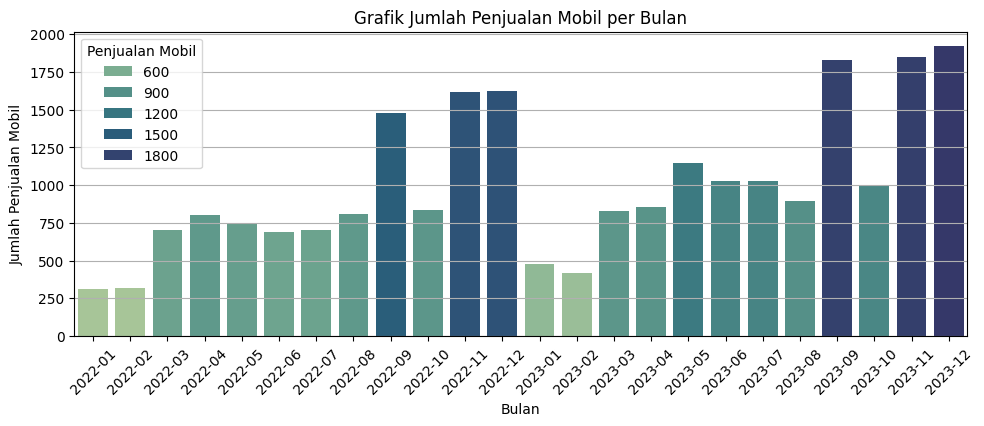

In [22]:
# Membuat grafik barplot
fig = plt.subplots(figsize=(10,4))
sns.barplot(data=car_sales, x='Bulan', y='Jumlah Penjualan', hue='Jumlah Penjualan', palette='crest')

# Label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan Mobil')
plt.title('Grafik Jumlah Penjualan Mobil per Bulan')
plt.legend(title='Penjualan Mobil')

# Menampilkan grid horizontal
plt.gca().yaxis.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Dari grafik jumlah penjualan mobil per bulan, terlihat bahwa bulan Desember 2023 mencatatkan angka penjualan tertinggi dibandingkan bulan-bulan lainnya. Selain itu, tren secara keseluruhan menunjukkan bahwa penjualan mobil mengalami peningkatan yang konsisten dari tahun ke tahun, di mana hampir setiap bulan pada tahun 2023 mencatatkan volume penjualan yang lebih tinggi dibandingkan bulan yang sama pada tahun 2022.

Peningkatan ini tidak hanya mencerminkan momentum musiman di akhir tahun, tetapi juga kemungkinan besar dipengaruhi oleh faktor eksternal yang lebih luas. Salah satunya adalah pemulihan ekonomi pasca-pandemi COVID-19, yang mulai terlihat lebih stabil pada tahun 2023. Dengan pulihnya daya beli masyarakat, meningkatnya mobilitas, serta kembalinya kepercayaan konsumen terhadap pengeluaran besar seperti kendaraan, pasar otomotif menunjukkan pemulihan yang signifikan.

#### Harga Rata-Rata Mobil per Bulan

In [23]:
# Menghitung rata-rata harga mobil per bulan
car_price_mean = car.groupby('Bulan')[['Price ($)']].mean()

# Mengganti nama kolom
car_price_mean.columns = ['Harga Rata-Rata']

car_price_mean

,Harga Rata-Rata
Bulan,
2022-01,28355.301587
2022-02,27485.515625
2022-03,27662.495035
2022-04,28436.083750
2022-05,27477.448000
2022-06,28411.900000
2022-07,28478.574286
2022-08,29174.520988
2022-09,28622.519322


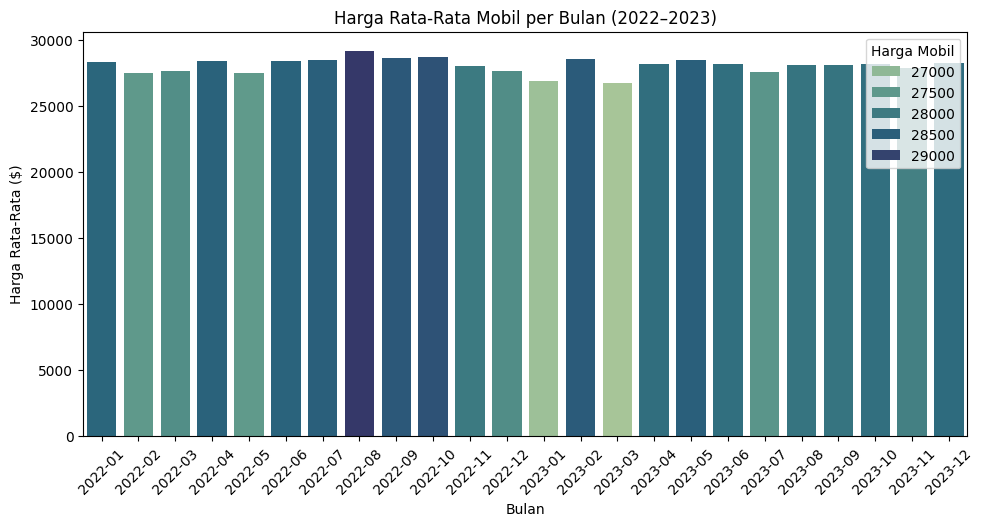

In [24]:
# Membuat grafik barplot
fig = plt.subplots(figsize=(10,5))
sns.barplot(data=car_price_mean, x='Bulan', y='Harga Rata-Rata', hue='Harga Rata-Rata', palette='crest')

# Label dan judul
plt.xlabel('Bulan')
plt.ylabel('Harga Rata-Rata ($)')
plt.title('Harga Rata-Rata Mobil per Bulan (2022–2023)')
plt.legend(title='Harga Mobil')

# Menampilkan grafik
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Visualisasi berikut menunjukkan rata-rata harga mobil yang terjual setiap bulan sepanjang tahun 2022–2023. Terlihat bahwa **tidak ada fluktuasi besar dalam harga rata-rata** sepanjang tahun, menandakan pasar cenderung stabil dalam hal penawaran harga mobil.

Meskipun demikian, pada bulan Desember — di mana terjadi lonjakan volume penjualan — **harga mobil juga tidak meningkat tajam**, sehingga bisa diasumsikan bahwa peningkatan penjualan bukan berasal dari mobil-mobil mahal, melainkan mungkin dari promosi akhir tahun atau peningkatan permintaan konsumen.


#### Analisis Korelasi Jumlah Penjualan dan Harga Rata-Rata Mobil per Bulan

In [25]:
# Menggabungkan data jumlah penjualan dan harga rata-rata mobil
car_join_price_mean = car_sales.join(car_price_mean, on='Bulan')

car_join_price_mean

,Jumlah Penjualan,Harga Rata-Rata
Bulan,,
2022-01,315,28355.301587
2022-02,320,27485.515625
2022-03,705,27662.495035
2022-04,800,28436.083750
2022-05,750,27477.448000
2022-06,690,28411.900000
2022-07,700,28478.574286
2022-08,810,29174.520988
2022-09,1475,28622.519322


In [26]:
# Menghitung korelasi Spearman
spearman_corr = car_join_price_mean.corr(method='spearman')

# Menampilkan hasil
print("Korelasi Spearman antara Jumlah Penjualan dan Harga Rata-Rata Mobil:")
spearman_corr

Korelasi Spearman antara Jumlah Penjualan dan Harga Rata-Rata Mobil:


,Jumlah Penjualan,Harga Rata-Rata
Jumlah Penjualan,1.000000,-0.016525
Harga Rata-Rata,-0.016525,1.000000


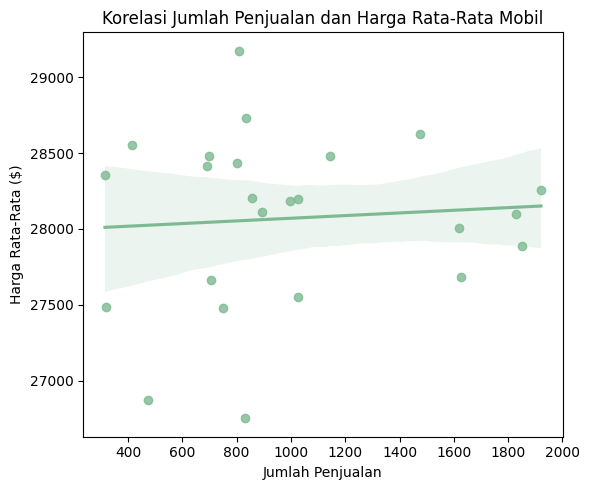

In [27]:
# Membuat grafik regression plot
fig = plt.subplots(figsize=(6,5))
sns.regplot(data=car_join_price_mean, x='Jumlah Penjualan', y='Harga Rata-Rata')

# Label dan judul
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Harga Rata-Rata ($)')
plt.title('Korelasi Jumlah Penjualan dan Harga Rata-Rata Mobil')

# Menampilkan grafik
plt.tight_layout()
plt.show()

Hasil analisis korelasi spearman antara harga rata-rata mobil dan jumlah penjualan per bulan menunjukkan nilai sebesar -0.016525, yang mengindikasikan hubungan linear yang sangat lemah atau hampir tidak ada. Dengan kata lain, perubahan harga rata-rata tidak memiliki pengaruh signifikan terhadap jumlah mobil yang terjual. Hal ini memperkuat insight sebelumnya bahwa faktor-faktor non-harga seperti momen promosi, musim liburan, atau perilaku konsumen akhir tahun kemungkinan berperan lebih besar dalam mendorong penjualan mobil.

### Analisis Penjualan pada Dealer

Untuk memahami performa penjualan secara lebih mendetail, analisis dealer tidak hanya melihat nama dealer secara umum, tetapi juga memperhitungkan wilayah operasional masing-masing dealer. Hal ini dilakukan karena satu dealer dapat memiliki beberapa cabang di berbagai wilayah, dan setiap cabang tersebut bisa memiliki performa penjualan yang berbeda-beda.

In [28]:
# Menghitung total penjualan per dealer dan region 
dealer_sales = car.groupby(['Dealer_Name','Dealer_Region'])[['Price ($)']].sum().reset_index()

# Mengurutkan dan seleksi top 10 dealer dengan penjualan tertinggi
dealer_sales_sorted = dealer_sales.sort_values(by=['Price ($)'], ascending=False)
dealer_sales_top10 = dealer_sales_sorted.head(10)
dealer_sales_top10

,Dealer_Name,Dealer_Region,Price ($)
129,Progressive Shippers Cooperative Association No,Janesville,29795259
163,Scrivener Performance Engineering,Greenville,28880779
190,U-Haul CO,Austin,28578406
154,Saab-Belle Dodge,Aurora,28487977
151,Ryder Truck Rental and Leasing,Middletown,28290409
141,Race Car Help,Austin,28288227
173,Star Enterprises Inc,Pasco,28265062
178,Suburban Ford,Janesville,28054789
139,Rabun Used Car Sales,Scottsdale,26868810
188,Tri-State Mack Inc,Scottsdale,25475649


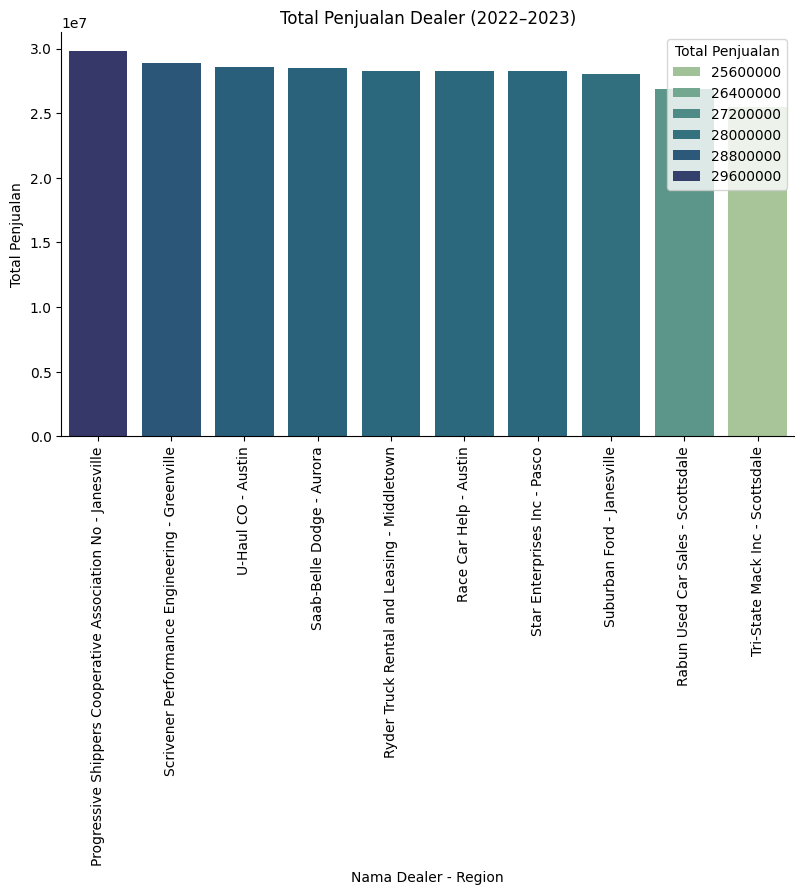

In [29]:
# Membuat grafik barplot
fig = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=dealer_sales_top10, x=dealer_sales_top10['Dealer_Name'] + ' - ' + dealer_sales_top10['Dealer_Region'], y='Price ($)', hue='Price ($)', palette='crest')

# Label dan judul
plt.xlabel('Nama Dealer - Region')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan Dealer (2022–2023)')
plt.legend(title='Total Penjualan')
despine(ax)

# Menampilkan grafik
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


Hasil analisis penjualan berdasarkan kombinasi Dealer_Name dan Dealer_Region menunjukkan bahwa cabang dari Progressive Shippers Cooperative Association di Janesville menjadi dealer dengan penjualan tertinggi, mencapai lebih dari $29 juta. Posisi ini disusul oleh Scrivener Performance Engineering di Greenville dan U-Haul CO di Austin, yang masing-masing mencatatkan penjualan di atas $28 juta.

Menariknya, terdapat beberapa wilayah seperti Austin dan Scottsdale yang muncul lebih dari satu kali dalam daftar ini. Hal ini mengindikasikan bahwa kota-kota tersebut merupakan pasar strategis dengan permintaan tinggi, di mana lebih dari satu dealer memiliki performa penjualan yang sangat baik.

Selain itu, keberagaman nama dealer di daftar ini, mulai dari perusahaan sewa kendaraan, dealer resmi, hingga penjual mobil bekas menunjukkan bahwa model bisnis yang berbeda-beda tetap bisa bersaing dalam hal volume penjualan, tergantung pada wilayah operasional dan strategi masing-masing cabang.

In [30]:
# Menghitung total penjualan per wilayah
dealer_region = car.groupby('Dealer_Region')[['Price ($)']].sum()
dealer_region_sorted = dealer_region.sort_values(by='Price ($)', ascending=False)
dealer_region_sorted

,Price ($)
Dealer_Region,
Austin,117192531
Janesville,106351234
Scottsdale,95969374
Aurora,88642382
Greenville,88149602
Pasco,88040714
Middletown,87134628


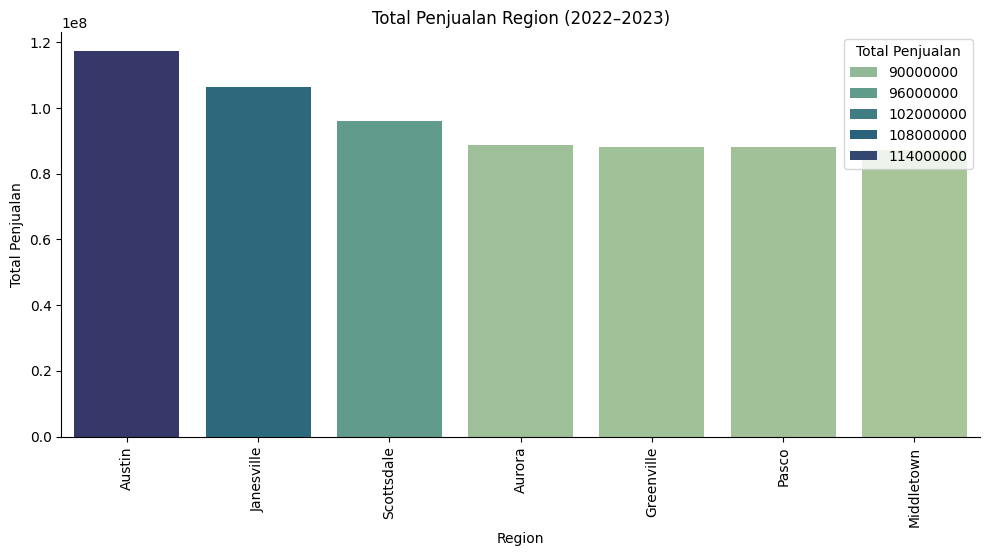

In [31]:
# Membuat grafik barplot
fig = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=dealer_region_sorted, x='Dealer_Region', y='Price ($)', hue='Price ($)', palette='crest')

# Label dan judul
plt.xlabel('Region')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan Region (2022–2023)')
plt.legend(title='Total Penjualan')
despine(ax)

# Menampilkan grafik
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


Analisis total penjualan berdasarkan wilayah (Dealer_Region) menunjukkan bahwa Austin menempati posisi teratas dengan nilai penjualan lebih dari $117 juta, diikuti oleh Janesville dan Scottsdale, masing-masing mencatatkan penjualan lebih dari $106 juta dan $95 juta. Hal ini menunjukkan bahwa ketiga kota tersebut merupakan pusat penjualan kendaraan yang sangat aktif selama periode analisis.

Temuan ini diperkuat oleh analisis sebelumnya pada tingkat dealer cabang, di mana masing-masing kota tersebut juga memiliki lebih dari satu dealer yang masuk dalam top 10 berdasarkan total penjualan. Sebagai contoh:

- Austin diwakili oleh U-Haul CO dan Race Car Help

- Janesville oleh Progressive Shippers Cooperative Association dan Suburban Ford

- Scottsdale oleh Rabun Used Car Sales dan Tri-State Mack Inc

Fakta bahwa kota-kota ini tidak hanya memiliki volume penjualan tertinggi, tetapi juga banyak dealer dengan performa tinggi, mengindikasikan bahwa faktor geografis dan demografis lokal sangat mendukung penjualan kendaraan. Dengan kata lain, bukan hanya satu dealer yang unggul, tetapi ekosistem pasarnya secara keseluruhan produktif.

## **Kesimpulan dan Rekomendasi**

### **Kesimpulan**

Demograsi Konsumen
- Pendapatan tahunan konsumen mobil mayoritas tergolong berpendapatan tinggi, menunjukkan bahwa pasar ini didominasi oleh segmen dengan daya beli kuat.
- Sebagian besar konsumen mobil berasal dari kelompok pria.

Tren Penjualan 
- Tren penjualan mobil menunjukkan peningkatan dari tahun 2022 ke 2023, hampir di setiap bulan.
- Penjualan mobil tertinggi terjadi pada bulan September, November, dan Desember.
- Harga rata-rata mobil sepanjang tahun 2022 dan 2023 relatif stabil dari bulan ke bulan.
- Analisis korelasi menunjukkan bahwa peningkatan penjualan tidak berkorelasi dengan perubahan harga rata-rata mobil.

Analisis Penjualan pada Dealer 
- Dealer-dealer dengan performa penjualan tertinggi berasal dari wilayah Austin, Janesville, dan Scottsdale, yang menunjukkan potensi geografis yang kuat dalam penjualan kendaraan.

### **Rekomendasi**

Demografi Konsumen
- Perlu strategi pemasaran yang lebih merata untuk menjangkau konsumen perempuan, mengingat dominasi pembeli pria.
- Pertimbangkan segmentasi produk dan promosi khusus untuk kelompok dengan pendapatan tinggi, misalnya dengan menawarkan model premium, fitur personalisasi, atau layanan eksklusif.

Tren Penjualan
- Fokuskan kampanye promosi dan diskon besar-besaran menjelang akhir tahun (September–Desember), terutama saat momentum liburan seperti Thanksgiving dan Natal.
- Karena harga rata-rata mobil cenderung stabil dan tidak mempengaruhi jumlah penjualan, strategi pricing dapat lebih fleksibel dan disesuaikan dengan segmentasi konsumen, bukan tren pasar umum.

Analisis Penjualan pada Dealer
- Wilayah seperti Austin, Janesville, dan Scottsdale layak menjadi prioritas untuk ekspansi, penguatan distribusi, atau investasi cabang baru.
- Evaluasi kinerja cabang di wilayah dengan penjualan tinggi untuk diadopsi sebagai model bagi dealer di wilayah lain.